In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from operator import itemgetter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Ансамблирование</b></h3>

#  Домашнее задание

### Задание  

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта https://www.kaggle.com/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.
        a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
        b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
        a) tree.DecisionTreeClassifier
        b) ensemble.RandomForestClassifier
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
        a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
        a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.
        a) Сравните метрики построенных моделей.
        b) Напишите свое мнение, какая модель наилучшая и почему.

##### 1. Получите данные и загрузите их в рабочую среду.

In [175]:
data = pd.read_csv('heart.csv')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [177]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [178]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [179]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


###### 2. Подготовьте датасет к обучению моделей.
        a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [180]:
data['Sex'].replace(['F','M'],[0,1], inplace=True)
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [181]:
data['ExerciseAngina'].replace(['N','Y'],[0,1], inplace=True)
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1


In [182]:
data = pd.get_dummies(data, columns = ['ChestPainType', 'RestingECG', 'ST_Slope'] )
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


        b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

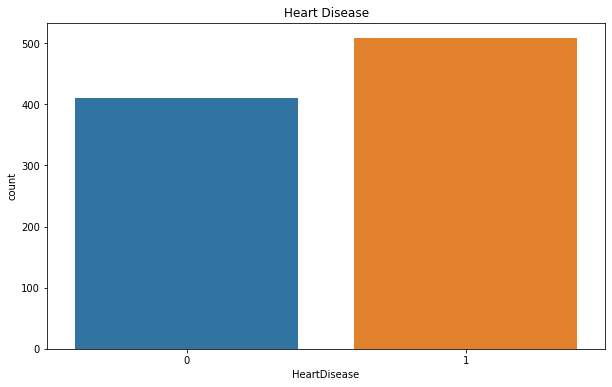

In [183]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "HeartDisease", data = data)
plt.title('Heart Disease')
plt.show()

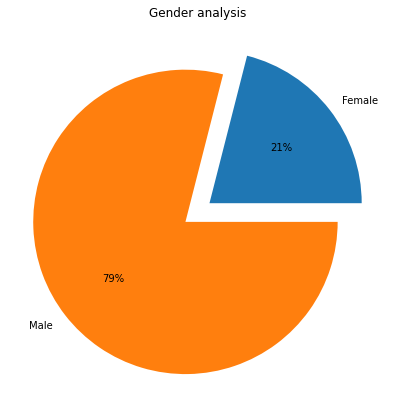

In [184]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(data['Sex'].value_counts().sort_values(), labels=labels, explode=[0.1,0.1], autopct='%1.0f%%')
plt.title('Gender analysis')
plt.show()

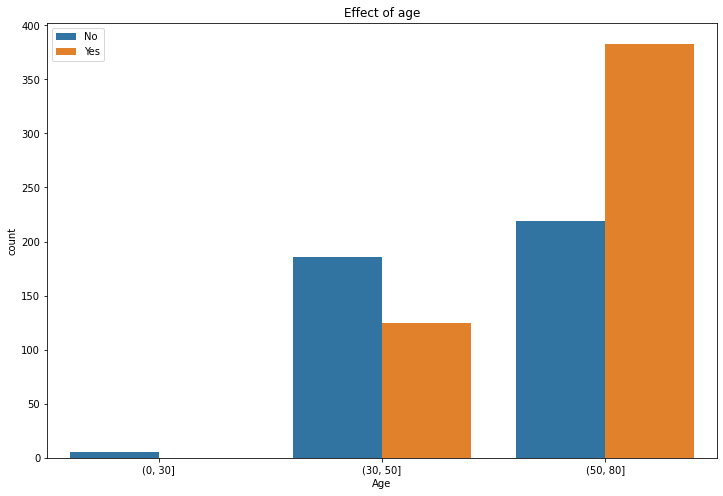

In [185]:
plt.figure(figsize=(12,8))
bins=[0,30,50,80]
sns.countplot(x=pd.cut(data.Age,bins=bins), hue=data.HeartDisease)
plt.legend(labels=["No","Yes"])
plt.title('Effect of age')
plt.show()

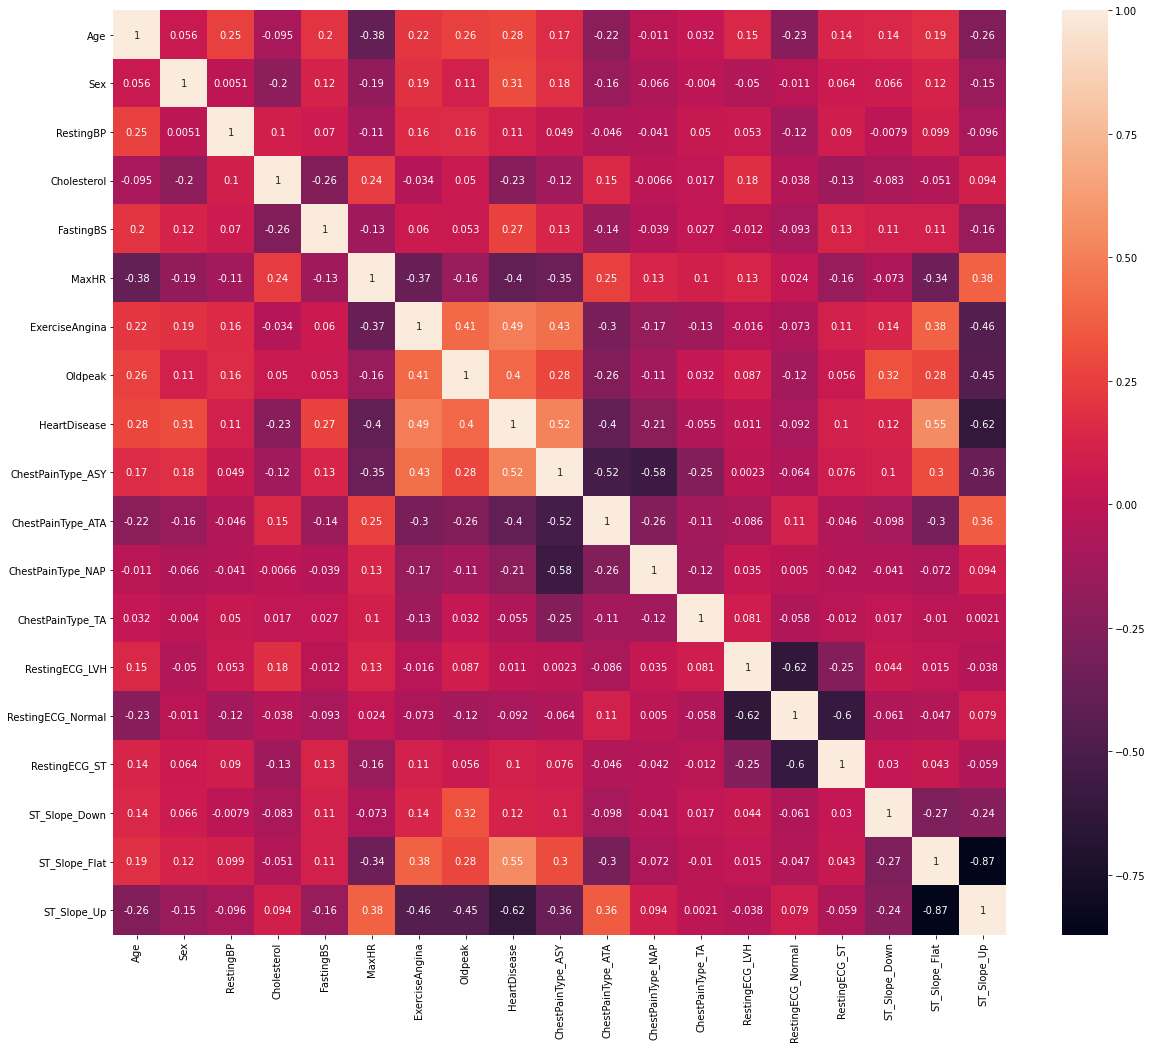

In [187]:
plt.figure(figsize=(20,17))
sns.heatmap(data.corr(), annot=True)
plt.show()

##### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [188]:
y, X = data['HeartDisease'], data.drop(columns='HeartDisease')

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
        a) tree.DecisionTreeClassifier

In [190]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred_dt), 4))

Accuracy score:  0.8098
F1 Score:  0.8276


In [101]:
dt.score(X_train, y_train)

1.0

In [191]:
dt.score(X_test, y_test)

0.8097826086956522

        b) ensemble.RandomForestClassifier

In [192]:
rf = RandomForestClassifier(n_estimators = 100) 

In [193]:
rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred_rf), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 4))

Accuracy score:  0.875
F1 Score:  0.89


In [194]:
rf.score(X_train, y_train)

1.0

In [195]:
rf.score(X_test, y_test)

0.875

##### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [196]:
# DecisionTreeClassifier 

predicted_dt = dt.predict(X_test)
report_dt = classification_report(y_test, predicted_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [197]:
# RandomForestClassifier

predicted_rf = rf.predict(X_test)
report_rf = classification_report(y_test, predicted_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



###### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [198]:
# DecisionTreeClassifier 

feature_imp_dt = pd.DataFrame(dt.feature_importances_, index = X.columns)
feature_imp_dt

,0
Age,0.084877
Sex,0.035152
RestingBP,0.041705
Cholesterol,0.116056
FastingBS,0.030498
MaxHR,0.079055
ExerciseAngina,0.033233
Oldpeak,0.072837
ChestPainType_ASY,0.058537
ChestPainType_ATA,0.000000


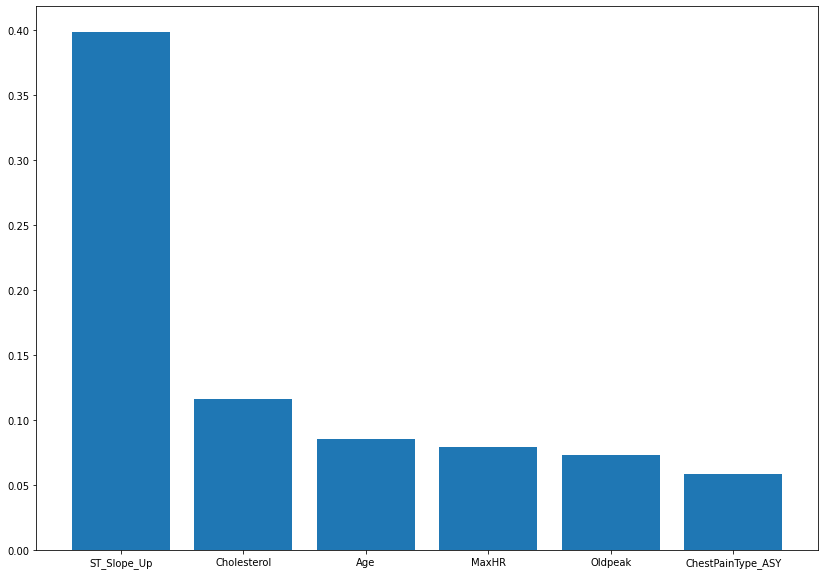

In [199]:
featurse_dict_dt = dict()

for feature in feature_imp_dt.index:
    if feature_imp_dt.loc[feature, 0] > 0.05:
        featurse_dict_dt[feature] = feature_imp_dt.loc[feature,0]

features_sort_dt = {key: value for key, value in sorted(featurse_dict_dt.items(), key=itemgetter(1), reverse=True)}

plt.figure(figsize=(14,10))
plt.bar(features_sort_dt.keys() , features_sort_dt.values())
plt.show()

In [200]:
# RandomForestClassifier

feature_imp_rf = pd.DataFrame(rf.feature_importances_, index = X.columns)
feature_imp_rf

,0
Age,0.084911
Sex,0.033196
RestingBP,0.067495
Cholesterol,0.096612
FastingBS,0.020132
MaxHR,0.095808
ExerciseAngina,0.081845
Oldpeak,0.103228
ChestPainType_ASY,0.068323
ChestPainType_ATA,0.028850


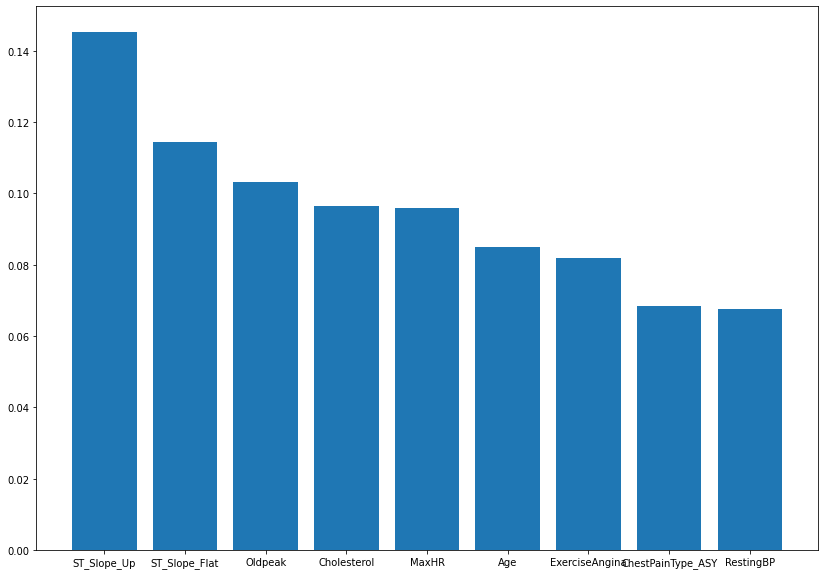

In [201]:
featurse_dict_rf = dict()

for feature in feature_imp_rf.index:
    if feature_imp_rf.loc[feature, 0] > 0.05:
        featurse_dict_rf[feature] = feature_imp_rf.loc[feature,0]

features_sort_rf = {key: value for key, value in sorted(featurse_dict_rf.items(), key=itemgetter(1), reverse=True)}

plt.figure(figsize=(14,10))
plt.bar(features_sort_rf.keys() , features_sort_rf.values())
plt.show()

###### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
        a) Повторите п. 5

In [224]:
# DecisionTreeClassifier 

bagging_dt = BaggingClassifier(DecisionTreeClassifier(random_state=42), 
                               n_estimators=50,
                               max_samples= .2, 
                               bootstrap=True, 
                               oob_score=True, 
                               random_state=42)

In [225]:
bagging_dt = bagging_dt.fit(X_train, y_train)

In [226]:
predicted_bagging_dt = bagging_dt.predict(X_test)
report_bagging_dt = classification_report(y_test, predicted_bagging_dt)
print(report_bagging_dt)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        77
           1       0.92      0.83      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [227]:
# RandomForestClassifier

bagging_rf = BaggingClassifier(RandomForestClassifier(n_estimators = 100),
                               max_samples= .2, 
                               bootstrap=True, 
                               oob_score=True, 
                               random_state=42)

In [228]:
bagging_rf = bagging_rf.fit(X_train, y_train)

In [229]:
predicted_bagging_rf = bagging_rf.predict(X_test)
report_bagging_rf = classification_report(y_test, predicted_bagging_rf)
print(report_bagging_rf)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



###### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
        a) Повторите п. 5

In [205]:
lsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
# lsvc = lsvc.fit(X_train, y_train)

In [206]:
import warnings
warnings.filterwarnings("ignore")

In [207]:
estimators = [
    ('Decision_tree', dt),
    ('Random_forest', rf),
    ('Linear_SVC', lsvc)
]

model_stack = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
model_stack.fit(X_train, y_train)


StackingClassifier(estimators=[('Decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('Random_forest', RandomForestClassifier()),
                               ('Linear_SVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=0,
                                                           tol=1e-05))]))],
                   final_estimator=LogisticRegression())

In [208]:
predicted_model_stack = bagging_dt.predict(X_test)
report_model_stack = classification_report(y_test, predicted_model_stack)
print(report_model_stack)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



##### 9. Сформулируйте выводы по проделанной работе.
        a) Сравните метрики построенных моделей.
        b) Напишите свое мнение, какая модель наилучшая и почему.

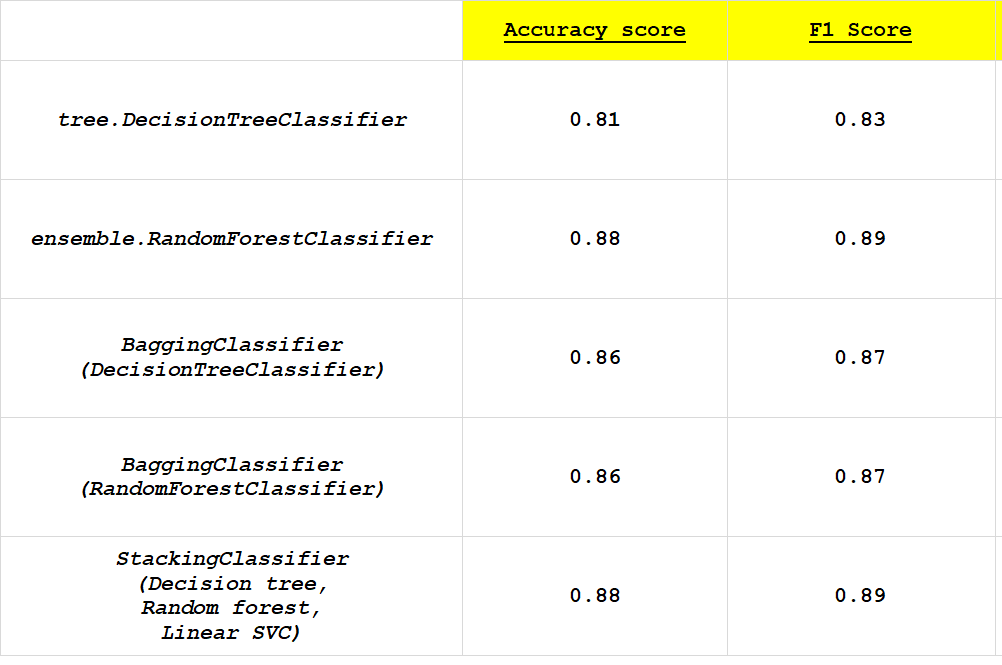

### ВЫВОДЫ: 

Обучение модели с помощью алгоритма ансамбля RandomForestClassifier лучше чем DecisionTreeClassifier. Ансамблирование BaggingClassifier для DecisionTreeClassifier улучшает результат.  
Стекинг трех моделей StackingClassifier показывает такие же результаты как и ансамбль RandomForestClassifier. При этом время обучения (визуально) заметно больше.